In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
gene_exp_surv_df = pd.read_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_Normalized_Expression_Par_Surv_Labeled.csv", index_col=[0], header=[0])

X = gene_exp_surv_df.iloc[:, :-1].to_numpy()
y = gene_exp_surv_df.iloc[:, -1].to_numpy()

In [3]:
from sklearn.preprocessing import StandardScaler

# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(X)
X_scaled=scaling.transform(X)

In [4]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_scaled)

explained variance ratio (first two components): [0.05980452 0.04922033]


Text(0.5, 1.0, 'PCA of SyNet dataset')

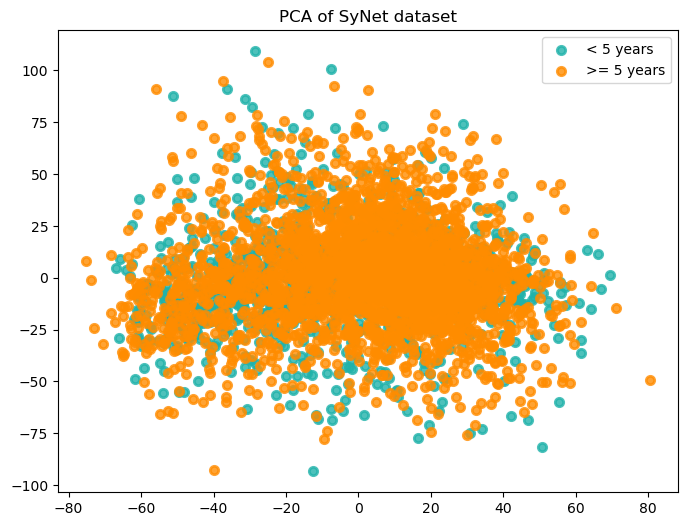

In [5]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

label_names = ["< 5 years", ">= 5 years"]

plt.figure(figsize=(8, 6))
colors = ["lightseagreen", "darkorange"]
lw = 2

for color, i, label_name in zip(colors, [0, 1], label_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=label_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of SyNet dataset")